In [271]:
import requests 
import pandas as pd
import geopandas as gpd

import json

In [272]:
from pathlib import Path

current_dir = Path().resolve()
parent_dir = current_dir.parent
raw_data_folder = parent_dir/ 'raw_data'

In [273]:
race_geojson = "acs2022_race.geojson"

race_gpf = gpd.read_file(raw_data_folder/race_geojson)
race_gpf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             151 non-null    object  
 1   name              151 non-null    object  
 2   B02001001         151 non-null    float64 
 3   B02001001, Error  150 non-null    float64 
 4   B02001002         151 non-null    float64 
 5   B02001002, Error  151 non-null    float64 
 6   B02001003         151 non-null    float64 
 7   B02001003, Error  151 non-null    float64 
 8   B02001004         151 non-null    float64 
 9   B02001004, Error  151 non-null    float64 
 10  B02001005         151 non-null    float64 
 11  B02001005, Error  151 non-null    float64 
 12  B02001006         151 non-null    float64 
 13  B02001006, Error  151 non-null    float64 
 14  B02001007         151 non-null    float64 
 15  B02001007, Error  151 non-null    float64 
 16  B02001008         

In [274]:
race_gpf.head()

,geoid,name,B02001001,"B02001001, Error",B02001002,"B02001002, Error",B02001003,"B02001003, Error",B02001004,"B02001004, Error",...,"B02001006, Error",B02001007,"B02001007, Error",B02001008,"B02001008, Error",B02001009,"B02001009, Error",B02001010,"B02001010, Error",geometry
0,04000US36,New York,19994380.0,NaN,11749652.0,14482.0,3011116.0,11329.0,93384.0,3470.0,...,1016.0,1878496.0,20691.0,1485013.0,17432.0,883505.0,14202.0,601508.0,9910.0,"MULTIPOLYGON (((-74.72623 44.99486, -74.72257 ..."
1,62000US36001,"Assembly District 1, NY",131095.0,1267.0,104940.0,2915.0,3298.0,1325.0,1130.0,737.0,...,34.0,7166.0,1644.0,11960.0,2310.0,9300.0,1919.0,2660.0,1192.0,"MULTIPOLYGON (((-72.83311 40.80633, -72.83275 ..."
2,62000US36002,"Assembly District 2, NY",130612.0,3265.0,108383.0,3578.0,7424.0,1191.0,75.0,60.0,...,10.0,4866.0,1328.0,7115.0,1474.0,4598.0,1170.0,2517.0,851.0,"MULTIPOLYGON (((-73.05195 41.07427, -73.04646 ..."
3,62000US36003,"Assembly District 3, NY",132041.0,3312.0,100782.0,3666.0,9959.0,1110.0,793.0,311.0,...,24.0,5695.0,1147.0,10970.0,2190.0,6978.0,1966.0,3992.0,978.0,"MULTIPOLYGON (((-73.03734 40.8222, -73.03361 4..."
4,62000US36004,"Assembly District 4, NY",132068.0,2941.0,93574.0,2851.0,11211.0,1415.0,268.0,142.0,...,43.0,5144.0,1318.0,10213.0,1793.0,5935.0,1417.0,4278.0,975.0,"MULTIPOLYGON (((-73.17697 41.04364, -73.17536 ..."


In [275]:
race_meta = "metadata_acs2022_race.json"

with open (raw_data_folder/race_meta, 'r') as file:
    race_header = json.load(file)

race_header

{'release': {'id': 'acs2022_5yr',
  'name': 'ACS 2022 5-year',
  'years': '2018-2022'},
 'tables': {'B02001': {'columns': {'B02001001': {'indent': 0,
     'name': 'Total:'},
    'B02001002': {'indent': 1, 'name': 'White alone'},
    'B02001003': {'indent': 1, 'name': 'Black or African American alone'},
    'B02001004': {'indent': 1,
     'name': 'American Indian and Alaska Native alone'},
    'B02001005': {'indent': 1, 'name': 'Asian alone'},
    'B02001006': {'indent': 1,
     'name': 'Native Hawaiian and Other Pacific Islander alone'},
    'B02001007': {'indent': 1, 'name': 'Some Other Race alone'},
    'B02001008': {'indent': 1, 'name': 'Two or More Races:'},
    'B02001009': {'indent': 2, 'name': 'Two races including Some Other Race'},
    'B02001010': {'indent': 2,
     'name': 'Two races excluding Some Other Race, and three or more races'}},
   'denominator_column_id': 'B02001001',
   'title': 'Race',
   'universe': 'Total population'}}}

In [276]:
for k, v in race_header.get('tables').get('B02001').get('columns').items():
    print(k,v.get('name'))

B02001001 Total:
B02001002 White alone
B02001003 Black or African American alone
B02001004 American Indian and Alaska Native alone
B02001005 Asian alone
B02001006 Native Hawaiian and Other Pacific Islander alone
B02001007 Some Other Race alone
B02001008 Two or More Races:
B02001009 Two races including Some Other Race
B02001010 Two races excluding Some Other Race, and three or more races


In [277]:
race_mapping = {}
for k, v in race_header.get('tables').get('B02001').get('columns').items():
    race_mapping[k]= v.get('name')

race_mapping

{'B02001001': 'Total:',
 'B02001002': 'White alone',
 'B02001003': 'Black or African American alone',
 'B02001004': 'American Indian and Alaska Native alone',
 'B02001005': 'Asian alone',
 'B02001006': 'Native Hawaiian and Other Pacific Islander alone',
 'B02001007': 'Some Other Race alone',
 'B02001008': 'Two or More Races:',
 'B02001009': 'Two races including Some Other Race',
 'B02001010': 'Two races excluding Some Other Race, and three or more races'}

In [278]:
race_drop_column = race_gpf.columns.str.contains('error', case=False, na=False)
race_gpf = race_gpf.drop(columns = race_gpf.columns[race_drop_column])

race_gpf = race_gpf.rename(columns = race_mapping)

race_gpf.head()

,geoid,name,Total:,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Two or More Races:,Two races including Some Other Race,"Two races excluding Some Other Race, and three or more races",geometry
0,04000US36,New York,19994380.0,11749652.0,3011116.0,93384.0,1767598.0,9120.0,1878496.0,1485013.0,883505.0,601508.0,"MULTIPOLYGON (((-74.72623 44.99486, -74.72257 ..."
1,62000US36001,"Assembly District 1, NY",131095.0,104940.0,3298.0,1130.0,2569.0,32.0,7166.0,11960.0,9300.0,2660.0,"MULTIPOLYGON (((-72.83311 40.80633, -72.83275 ..."
2,62000US36002,"Assembly District 2, NY",130612.0,108383.0,7424.0,75.0,2748.0,1.0,4866.0,7115.0,4598.0,2517.0,"MULTIPOLYGON (((-73.05195 41.07427, -73.04646 ..."
3,62000US36003,"Assembly District 3, NY",132041.0,100782.0,9959.0,793.0,3821.0,21.0,5695.0,10970.0,6978.0,3992.0,"MULTIPOLYGON (((-73.03734 40.8222, -73.03361 4..."
4,62000US36004,"Assembly District 4, NY",132068.0,93574.0,11211.0,268.0,11625.0,33.0,5144.0,10213.0,5935.0,4278.0,"MULTIPOLYGON (((-73.17697 41.04364, -73.17536 ..."


In [279]:
race_gpf['white_pct'] = race_gpf['White alone'] / race_gpf['Total:']

race_gpf['black_pct'] = race_gpf['Black or African American alone'] / race_gpf['Total:']

race_gpf['natives_pct'] = race_gpf['American Indian and Alaska Native alone'] / race_gpf['Total:']

race_gpf['asian_pct']


KeyError: 'asian_pct'

In [295]:
income_geojson = "acs2022_median_household_income.geojson"

income_gpf = gpd.read_file(raw_data_folder/income_geojson)
income_gpf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             151 non-null    object  
 1   name              151 non-null    object  
 2   B19013001         151 non-null    float64 
 3   B19013001, Error  151 non-null    float64 
 4   geometry          151 non-null    geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 6.0+ KB


In [296]:
income_gpf.head()

,geoid,name,B19013001,"B19013001, Error",geometry
0,04000US36,New York,81386.0,350.0,"MULTIPOLYGON (((-74.72623 44.99486, -74.72257 ..."
1,62000US36001,"Assembly District 1, NY",117323.0,5140.0,"MULTIPOLYGON (((-72.83311 40.80633, -72.83275 ..."
2,62000US36002,"Assembly District 2, NY",108643.0,6169.0,"MULTIPOLYGON (((-73.05195 41.07427, -73.04646 ..."
3,62000US36003,"Assembly District 3, NY",105508.0,3932.0,"MULTIPOLYGON (((-73.03734 40.8222, -73.03361 4..."
4,62000US36004,"Assembly District 4, NY",121591.0,4510.0,"MULTIPOLYGON (((-73.17697 41.04364, -73.17536 ..."


In [297]:
income_meta = "metadata_acs2022_median_household_income.json"


with open (raw_data_folder/income_meta, 'r') as file:
    income_header = json.load(file)

income_header

{'release': {'id': 'acs2022_5yr',
  'name': 'ACS 2022 5-year',
  'years': '2018-2022'},
 'tables': {'B19013': {'columns': {'B19013001': {'indent': 0,
     'name': 'Median household income in the past 12 months (in 2022 inflation-adjusted dollars)'}},
   'denominator_column_id': None,
   'title': 'Median Household Income in the Past 12 Months (In 2022 Inflation-adjusted Dollars)',
   'universe': 'Households'}}}

In [298]:
income_column = income_header.get('tables').get('B19013').get('columns')
income_column

{'B19013001': {'indent': 0,
  'name': 'Median household income in the past 12 months (in 2022 inflation-adjusted dollars)'}}

In [299]:
income_mapping = {}

for k, v in income_column.items():
    income_mapping[k] = v.get('name')

income_mapping

{'B19013001': 'Median household income in the past 12 months (in 2022 inflation-adjusted dollars)'}

In [300]:
income_gpf.head()

,geoid,name,B19013001,"B19013001, Error",geometry
0,04000US36,New York,81386.0,350.0,"MULTIPOLYGON (((-74.72623 44.99486, -74.72257 ..."
1,62000US36001,"Assembly District 1, NY",117323.0,5140.0,"MULTIPOLYGON (((-72.83311 40.80633, -72.83275 ..."
2,62000US36002,"Assembly District 2, NY",108643.0,6169.0,"MULTIPOLYGON (((-73.05195 41.07427, -73.04646 ..."
3,62000US36003,"Assembly District 3, NY",105508.0,3932.0,"MULTIPOLYGON (((-73.03734 40.8222, -73.03361 4..."
4,62000US36004,"Assembly District 4, NY",121591.0,4510.0,"MULTIPOLYGON (((-73.17697 41.04364, -73.17536 ..."


In [301]:
income_gpf = income_gpf.rename(columns = income_mapping)

income_gpf = income_gpf.drop(columns= 'B19013001, Error')

income_gpf = income_gpf.loc[1:]

income_gpf.head()


,geoid,name,Median household income in the past 12 months (in 2022 inflation-adjusted dollars),geometry
1,62000US36001,"Assembly District 1, NY",117323.0,"MULTIPOLYGON (((-72.83311 40.80633, -72.83275 ..."
2,62000US36002,"Assembly District 2, NY",108643.0,"MULTIPOLYGON (((-73.05195 41.07427, -73.04646 ..."
3,62000US36003,"Assembly District 3, NY",105508.0,"MULTIPOLYGON (((-73.03734 40.8222, -73.03361 4..."
4,62000US36004,"Assembly District 4, NY",121591.0,"MULTIPOLYGON (((-73.17697 41.04364, -73.17536 ..."
5,62000US36005,"Assembly District 5, NY",121637.0,"MULTIPOLYGON (((-73.18486 40.80886, -73.18422 ..."


<Axes: >

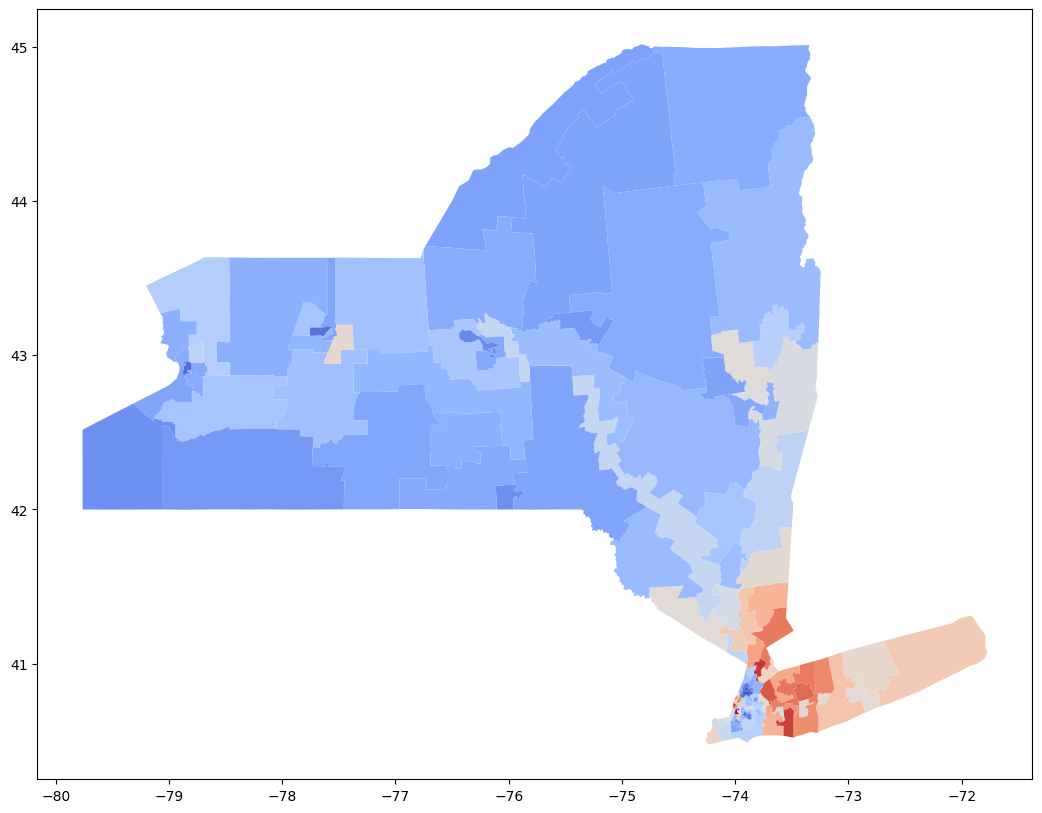

In [304]:
income_gpf.plot('Median household income in the past 12 months (in 2022 inflation-adjusted dollars)',
                  cmap='coolwarm',
                  figsize=(15,10),
                  legend=False)

In [ ]:
income_gpf.to_